---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_figure.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a> -->

## 📈📈Annotating figure.

In [1]:
# requirements
import matplotlib.pyplot as plt

In [2]:
import numpy as np

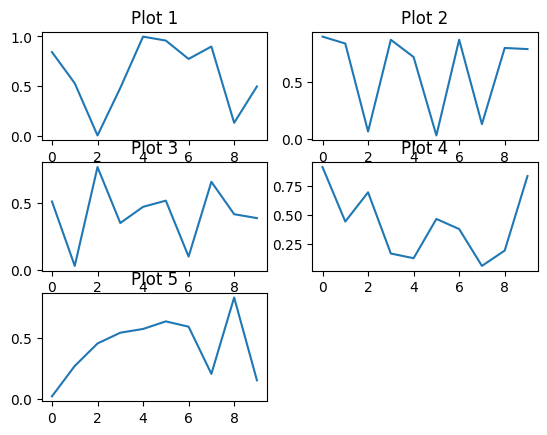

In [3]:
# Start with a figure
# plt.figure(figsize=(10, 8))
from roux.viz.figure import gca
# Add 5 plots using the function with max_cols=2
for i in range(5):
    ax = gca(cols_max=2)
    ax.plot(np.random.rand(10))
    ax.set_title(f'Plot {i+1}')

**Demo figure**

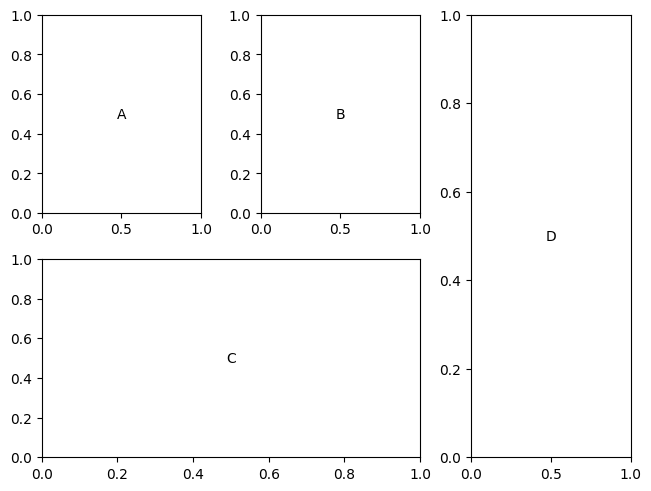

In [4]:
def demo_figure():
    def identify_axes(ax_dict, fontsize=None):
        """
        Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/mosaic.html#complex-and-semantic-figure-composition-subplot-mosaic
        """
        kw = dict(ha="center", va="center", fontsize=fontsize, color=None)
        for k, ax in ax_dict.items():
            ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)
    fig=plt.figure(layout="constrained")
    axd = fig.subplot_mosaic(
        """
        ABD
        CCD
        """
    )
    identify_axes(axd)
    return fig
_=demo_figure()

### Align texts in different subplots 

In [5]:
# import the function from roux
from roux.viz.figure import align_texts

100%|███████████████████████████████████████| 45/45 [00:00<00:00, 471859.20it/s]


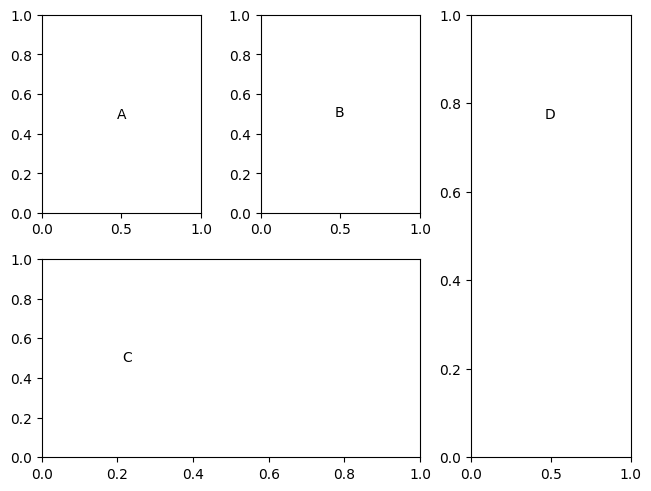

In [6]:
fig=demo_figure()

## align A, B and D vertically
align_texts(
    fig=fig,
    texts=['A','B','D'],  
    align='v',
    test=False,
    )          

## align A and C horizontally
align_texts(
    fig=fig,
    texts=['A','C'],
    align='h',
    test=False,
    )           

### Connections

In [7]:
import pandas as pd
data=(
        pd.DataFrame(
            {'ax1x':range(2)}
        )
        .assign(
            # ax1y='ymin',
            ax2x=lambda df: df['ax1x'].tolist()[::-1],
            # ax2y='ymax',
        )
    )
data

,ax1x,ax2x
0,0,1
1,1,0


,ax1x,ax2x,ymin,ymax
0,0,1,0.0,1.0
1,1,0,0.0,1.0


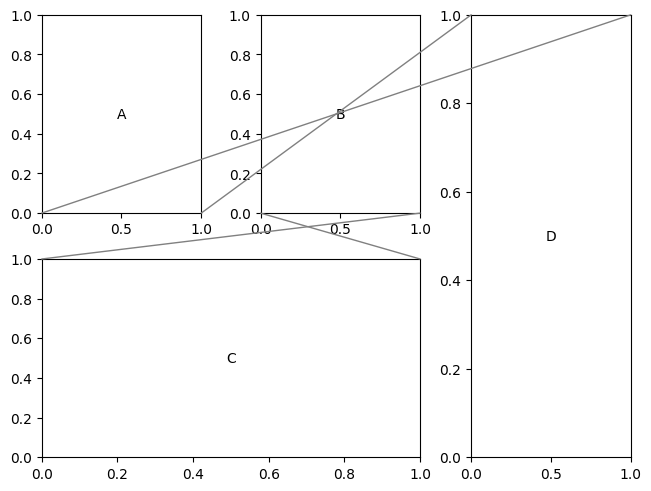

In [8]:
# import the function from roux
from roux.viz.figure import annot_axs
# %run ../roux/viz/figure.py
fig=demo_figure()
annot_axs(
    ax1=fig.axes[0],
    ax2=fig.axes[2],
    data=data,
    cols=dict(
        ax1x='ax1x',
        ax1y='ymin',
        ax2x='ax2x',
        ax2y='ymax',
    )
)
annot_axs(
    ax1=fig.axes[1],
    ax2=fig.axes[3],
    data=data,
    cols=dict(
        ax1x='ax1x',
        ax1y='ymin',
        ax2x='ax2x',
        ax2y='ymax',
    )
)

#### Documentation
[`roux.viz.figure`](https://github.com/rraadd88/roux#module-rouxvizfigure)